In [12]:
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from ppi_py.experiments import run
import pandas as pd

# Run Experiments

In [14]:
ns = [50, 100]
ps = [10, 50, 100, 200, 300, 350, 400, 500]
df = run(
    ns=ns, ps=ps,
    N = 400, num_trials=30,
    noise=1.0, sig=2.0, bet=0.0
)

df.to_csv("results/output.csv", index=False)

# Plots

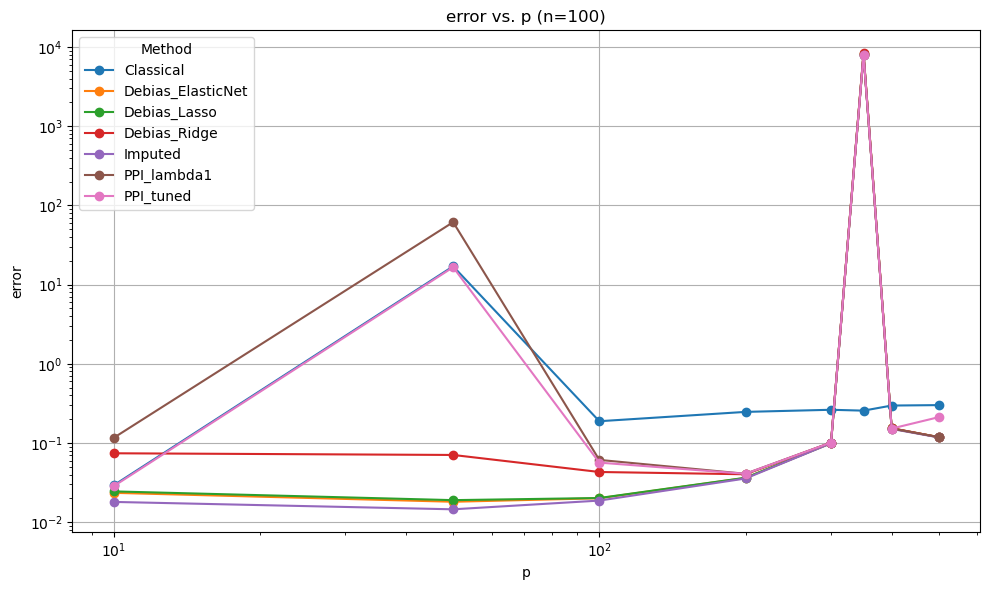

In [15]:
import matplotlib.pyplot as plt

df = pd.read_csv("results/output.csv")
df = df[df["n"] == 50]
cat = "p"
note = "n=100"
type = "error"

df_avg = df.groupby(["method",cat])[type].mean().reset_index()

plt.figure(figsize=(10, 6))
for method in df_avg["method"].unique():
    subset = df_avg[df_avg["method"] == method]
    plt.plot(subset[cat], subset[type], marker='o', label=method)

plt.title(type + " vs. "+ cat +" ({})".format(note))
plt.xlabel(cat)
plt.ylabel(type)
plt.yscale("log")
plt.xscale("log")  
plt.grid(True)
plt.legend(title="Method")
plt.tight_layout()
plt.show()